<a href="https://colab.research.google.com/github/feetfetish999666-max/simula-o-foguete-rk4-/blob/main/Simula%C3%A7%C3%A3o_de_Foguete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tempo de simula√ß√£o: 599.9 s
Tempo de burnout (fim da queima): 147.1 s
Altitude m√°xima alcan√ßada (durante simula√ß√£o): 692407.8 m
Velocidade m√°xima alcan√ßada: 3261.8 m/s
Dist√¢ncia horizontal m√°xima alcan√ßada: 0.0 m


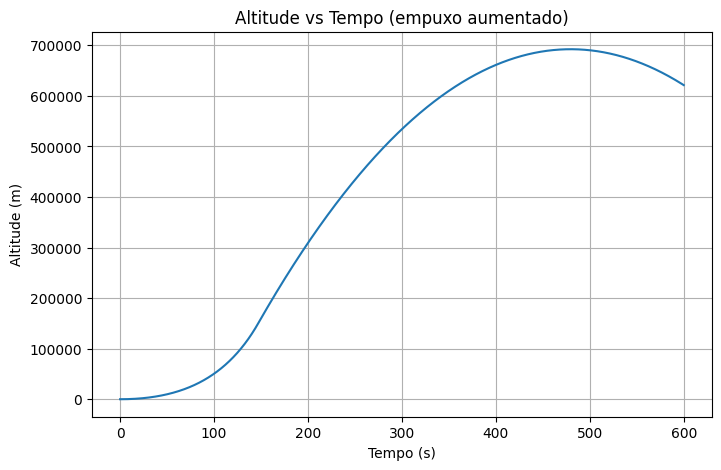

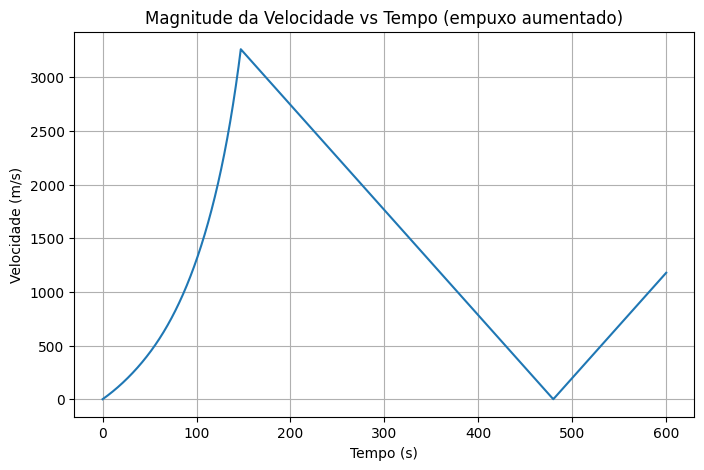

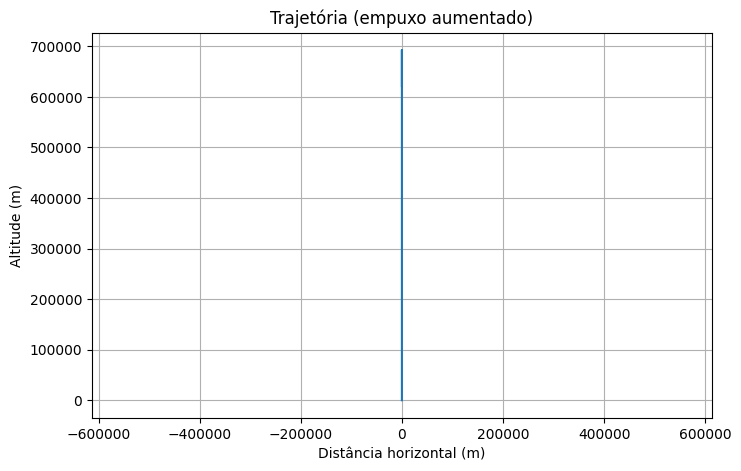

In [1]:
# Vamos repetir a simula√ß√£o com empuxo maior (ex.: 8e6 N) para mostrar um caso onde o foguete decola.
import math, numpy as np, matplotlib.pyplot as plt

g0 = 9.80665
rho0 = 1.225
H = 8500.0

thrust = 8.0e6            # empuxo aumentado
mass_initial = 5.0e5
dry_mass = 1.0e5
Isp = 300.0
Cd = 0.5
A = 10.0
mdot = thrust / (Isp * g0)

dt = 0.1
t_max = 600.0

t = 0.0
x = 0.0  # horizontal position
y = 0.0  # vertical position
vx = 0.0 # horizontal velocity
vy = 0.0 # vertical velocity
m = mass_initial

times = []
altitudes = []
horizontal_distances = []
velocities_magnitude = []
masses = []
thrusts = []

burning = True

while t <= t_max:
    rho = rho0 * math.exp(-y / H)
    v_mag = math.hypot(vx, vy)
    drag = 0.5 * rho * v_mag * abs(v_mag) * Cd * A

    if v_mag > 1e-9:
        drag_x = drag * (vx / v_mag)
        drag_y = drag * (vy / v_mag)
    else:
        drag_x = 0.0
        drag_y = 0.0

    if burning and (m - dry_mass) > 0:
        T = thrust
        dm = mdot * dt
        if (m - dm) < dry_mass:
            dm = m - dry_mass
            burning = False
    else:
        T = 0.0
        dm = 0.0
        burning = False

    # Assuming vertical thrust for now, adjust for pitch later if needed
    thrust_x = 0.0
    thrust_y = T

    ax = (thrust_x - drag_x) / m
    ay = (thrust_y - drag_y) / m - g0

    vx = vx + ax * dt
    vy = vy + ay * dt
    x = x + vx * dt
    y = y + vy * dt
    m = m - dm

    if y < 0 and t > 0.1:
        y = 0.0
        break

    times.append(t)
    altitudes.append(y)
    horizontal_distances.append(x)
    velocities_magnitude.append(v_mag)
    masses.append(m)
    thrusts.append(T)

    t += dt

times = np.array(times)
altitudes = np.array(altitudes)
horizontal_distances = np.array(horizontal_distances)
velocities_magnitude = np.array(velocities_magnitude)
masses = np.array(masses)
thrusts = np.array(thrusts)

burnout_index = np.where(thrusts == 0)[0]
burnout_time = times[burnout_index[0]] if burnout_index.size > 0 else times[-1]
max_altitude = altitudes.max()
max_velocity = velocities_magnitude.max()

print(f"Tempo de simula√ß√£o: {times[-1]:.1f} s")
print(f"Tempo de burnout (fim da queima): {burnout_time:.1f} s")
print(f"Altitude m√°xima alcan√ßada (durante simula√ß√£o): {max_altitude:.1f} m")
print(f"Velocidade m√°xima alcan√ßada: {max_velocity:.1f} m/s")
print(f"Dist√¢ncia horizontal m√°xima alcan√ßada: {horizontal_distances[-1]:.1f} m")


plt.figure(figsize=(8,5))
plt.plot(times, altitudes)
plt.title("Altitude vs Tempo (empuxo aumentado)")
plt.xlabel("Tempo (s)")
plt.ylabel("Altitude (m)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(times, velocities_magnitude)
plt.title("Magnitude da Velocidade vs Tempo (empuxo aumentado)")
plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade (m/s)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(horizontal_distances, altitudes)
plt.title("Trajet√≥ria (empuxo aumentado)")
plt.xlabel("Dist√¢ncia horizontal (m)")
plt.ylabel("Altitude (m)")
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
# Simula√ß√£o simples de subida vertical de um foguete (modelo 1D)
# - Integra√ß√£o por passo de tempo (m√©todo de Euler expl√≠cito, simples e did√°tico)
# - Considera empuxo constante durante queima, arrasto com densidade do ar decaindo com altitude,
#   e perda de massa por queima de combust√≠vel (Isp).
# - Gera dois gr√°ficos: altitude x tempo e velocidade x tempo.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# --- Par√¢metros do ambiente ---
g0 = 9.80665               # m/s^2, gravidade ao n√≠vel do mar
rho0 = 1.225               # kg/m^3, densidade ao n√≠vel do mar
H = 8500.0                 # m, escala exponencial da atmosfera (densidade ~ exp(-h/H))

In [ ]:
# --- Par√¢metros do foguete (exemplo did√°tico) ---
thrust = 7.0e5             # N, empuxo constante durante a queima
mass_initial = 5.0e5       # kg, massa total inicial (inclui combust√≠vel)
dry_mass = 1.0e5           # kg, massa seca (sem combust√≠vel)
fuel_mass = mass_initial - dry_mass
Isp = 300.0                # s, impulso espec√≠fico
Cd = 0.5                   # coeficiente de arrasto
A = 10.0                   # m^2, √°rea de refer√™ncia (sec√ß√£o)

In [ ]:
# taxa de consumo de combust√≠vel (assumindo empuxo constante): mdot = T / (Isp * g0)
mdot = thrust / (Isp * g0)  # kg/s

# --- Configura√ß√£o da integra√ß√£o ---
dt = 0.1                   # s, passo de tempo
t_max = 600.0              # s, tempo m√°ximo da simula√ß√£o

In [ ]:
# --- Estado inicial ---
t = 0.0
h = 0.0                    # altitude (m)
v = 0.0                    # velocidade vertical positiva para cima (m/s)
m = mass_initial           # massa atual (kg)

In [ ]:
    # densidade do ar em fun√ß√£o da altitude (modelo exponencial simples)
    rho = rho0 * math.exp(-h / H)

In [ ]:
# Armazenamento de trajet√≥rias para plot
times = []
altitudes = []
velocities = []
masses = []
thrusts = []

import numpy as np
import matplotlib.pyplot as plt

# Constantes
g0 = 9.81          # gravidade m/s¬≤
Re = 6371000       # raio da Terra (m)
rho0 = 1.225       # densidade do ar ao n√≠vel do mar (kg/m¬≥)
H = 8500           # escala da atmosfera (m)

# Par√¢metros do foguete
m0 = 500000        # massa inicial (kg)
mf = 100000        # massa final ap√≥s queima (kg)
thrust = 7e6       # empuxo (N)
burn_time = 150    # tempo de queima (s)
Cd = 0.3           # coeficiente de arrasto
A = 10             # √°rea de refer√™ncia (m¬≤)

# Simula√ß√£o
dt = 0.1
t_max = 600

def simulate(pitch_enabled=True):
    x, y = 0, 0         # posi√ß√£o
    vx, vy = 0, 0       # velocidades
    m = m0
    t = 0.0

    traj_x, traj_y = [], []

    while t <= t_max:
        # Massa e empuxo
        if t < burn_time:
            m = m0 - (m0 - mf)*(t/burn_time)
            thrust_now = thrust
        else:
            thrust_now = 0

        # Densidade do ar
        rho = rho0*np.exp(-y/H)
        v = np.sqrt(vx**2 + vy**2)
        drag = 0.5*rho*v**2*Cd*A

        # √Çngulo de pitch
        if pitch_enabled and t < burn_time:
            if y < 200:   # sobe reto at√© 200 m
                pitch_angle = 90*np.pi/180
            elif y < 50000:  # curva suave at√© 50 km
                frac = (y-200)/(50000-200)
                pitch_angle = (90 - frac*85)*np.pi/180
            else:
                pitch_angle = 5*np.pi/180
        else:
            pitch_angle = 90*np.pi/180

        # Componentes do empuxo + arrasto + gravidade
        Fx = thrust_now*np.cos(pitch_angle) - drag*(vx/v if v>0 else 0)
        Fy = thrust_now*np.sin(pitch_angle) - drag*(vy/v if v>0 else 0) - m*g0

        # Acelera√ß√£o
        ax, ay = Fx/m, Fy/m

        # Atualiza velocidades e posi√ß√µes
        vx += ax*dt
        vy += ay*dt
        x += vx*dt
        y += vy*dt

        traj_x.append(x/1000) # km
        traj_y.append(y/1000) # km

        if y < 0:  # foguete caiu no solo
            break

        t += dt   # ESSENCIAL ‚Üí avan√ßa o tempo no while!

    return np.array(traj_x), np.array(traj_y), vx, vy

# Simula√ß√£o com e sem pitch-over
traj_x1, traj_y1, vx1, vy1 = simulate(pitch_enabled=False)
traj_x2, traj_y2, vx2, vy2 = simulate(pitch_enabled=True)

# Plot das trajet√≥rias
plt.figure(figsize=(8,6))
plt.plot(traj_x1, traj_y1, label="Sem pitch-over (reta vertical)")
plt.plot(traj_x2, traj_y2, label="Com pitch-over (trajet√≥ria orbital)")
plt.xlabel("Dist√¢ncia horizontal (km)")
plt.ylabel("Altitude (km)")
plt.title("Compara√ß√£o: Trajet√≥ria de foguete")
plt.legend()
plt.grid()
plt.show()

print("üöÄ Sem pitch-over -> Velocidade final: %.1f m/s (vx=%.1f, vy=%.1f)" % (np.sqrt(vx1**2+vy1**2), vx1, vy1))
print("üöÄ Com pitch-over -> Velocidade final: %.1f m/s (vx=%.1f, vy=%.1f)" % (np.sqrt(vx2**2+vy2**2), vx2, vy2))

In [ ]:
while t <= t_max: print ("tempo:",t)

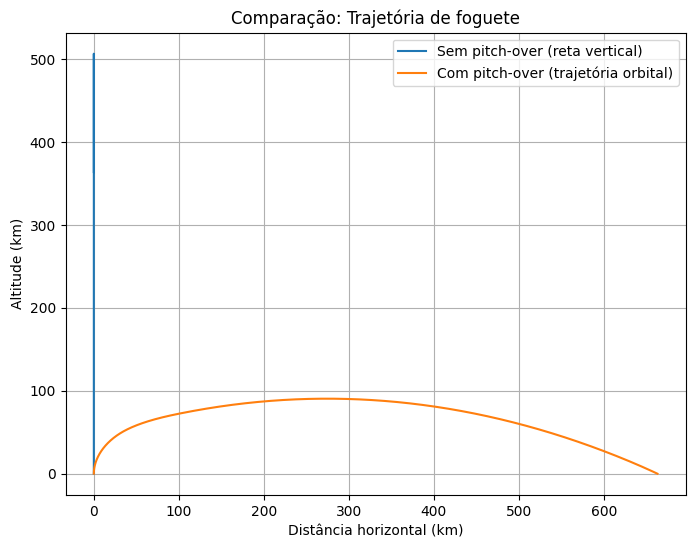

üöÄ Sem pitch-over -> Velocidade final: 1673.0 m/s (vx=0.0, vy=-1673.0)
üöÄ Com pitch-over -> Velocidade final: 2173.2 m/s (vx=1954.5, vy=-950.0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
g0 = 9.81          # gravidade m/s¬≤
Re = 6371000       # raio da Terra (m)
rho0 = 1.225       # densidade do ar ao n√≠vel do mar (kg/m¬≥)
H = 8500           # escala da atmosfera (m)

# Par√¢metros do foguete
m0 = 500000        # massa inicial (kg)
mf = 100000        # massa final ap√≥s queima (kg)
thrust = 7e6       # empuxo (N)
burn_time = 150    # tempo de queima (s)
Cd = 0.3           # coeficiente de arrasto
A = 10             # √°rea de refer√™ncia (m¬≤)

# Simula√ß√£o
dt = 0.1
t_max = 600

def simulate(pitch_enabled=True):
    x, y = 0, 0         # posi√ß√£o
    vx, vy = 0, 0       # velocidades
    m = m0
    t = 0.0

    traj_x, traj_y = [], []

    while t <= t_max:
        # Massa e empuxo
        if t < burn_time:
            m = m0 - (m0 - mf)*(t/burn_time)
            thrust_now = thrust
        else:
            thrust_now = 0

        # Densidade do ar
        rho = rho0*np.exp(-y/H)
        v = np.sqrt(vx**2 + vy**2)
        drag = 0.5*rho*v**2*Cd*A

        # √Çngulo de pitch
        if pitch_enabled and t < burn_time:
            if y < 200:   # sobe reto at√© 200 m
                pitch_angle = 90*np.pi/180
            elif y < 50000:  # curva suave at√© 50 km
                frac = (y-200)/(50000-200)
                pitch_angle = (90 - frac*85)*np.pi/180
            else:
                pitch_angle = 5*np.pi/180
        else:
            pitch_angle = 90*np.pi/180

        # Componentes do empuxo + arrasto + gravidade
        Fx = thrust_now*np.cos(pitch_angle) - drag*(vx/v if v>0 else 0)
        Fy = thrust_now*np.sin(pitch_angle) - drag*(vy/v if v>0 else 0) - m*g0

        # Acelera√ß√£o
        ax, ay = Fx/m, Fy/m

        # Atualiza velocidades e posi√ß√µes
        vx += ax*dt
        vy += ay*dt
        x += vx*dt
        y += vy*dt

        traj_x.append(x/1000) # km
        traj_y.append(y/1000) # km

        if y < 0:  # foguete caiu no solo
            break

        t += dt   # ESSENCIAL ‚Üí avan√ßa o tempo no while!

    return np.array(traj_x), np.array(traj_y), vx, vy

# Simula√ß√£o com e sem pitch-over
traj_x1, traj_y1, vx1, vy1 = simulate(pitch_enabled=False)
traj_x2, traj_y2, vx2, vy2 = simulate(pitch_enabled=True)

# Plot das trajet√≥rias
plt.figure(figsize=(8,6))
plt.plot(traj_x1, traj_y1, label="Sem pitch-over (reta vertical)")
plt.plot(traj_x2, traj_y2, label="Com pitch-over (trajet√≥ria orbital)")
plt.xlabel("Dist√¢ncia horizontal (km)")
plt.ylabel("Altitude (km)")
plt.title("Compara√ß√£o: Trajet√≥ria de foguete")
plt.legend()
plt.grid()
plt.show()

print("üöÄ Sem pitch-over -> Velocidade final: %.1f m/s (vx=%.1f, vy=%.1f)" % (np.sqrt(vx1**2+vy1**2), vx1, vy1))
print("üöÄ Com pitch-over -> Velocidade final: %.1f m/s (vx=%.1f, vy=%.1f)" % (np.sqrt(vx2**2+vy2**2), vx2, vy2))

In [ ]:
burning = True

In [ ]:
t = 0
while t <= t_max:
    # ... (seu c√≥digo de atualiza√ß√£o da simula√ß√£o)

    t += dt   # <- ESSENCIAL! sen√£o nunca sai do while

In [ ]:
    # densidade do ar em fun√ß√£o da altitude (modelo exponencial simples)
    rho = rho0 * math.exp(-h / H)

In [ ]:
    # arrasto (sentido oposto √† velocidade)
    drag = 0.5 * rho * v * abs(v) * Cd * A  # = 0.5*rho*Cd*A*v^2, com sinal via v*abs(v)

In [ ]:
    # enquanto houver combust√≠vel, aplicamos empuxo e consumimos massa
    if burning and (m - dry_mass) > 0:
        T = thrust
        dm = mdot * dt
        # n√£o permita que massa caia abaixo da massa seca
        if (m - dm) < dry_mass:
            dm = m - dry_mass
            burning = False
    else:
        T = 0.0
        dm = 0.0
        burning = False

In [ ]:
    # acelera√ß√£o: a = (T - D) / m - g(h)
    # consideramos g constante (g0); para maior precis√£o poderia usar g(h) com 1/r^2
    a = (T - drag) / m - g0

In [ ]:
    # integra√ß√£o expl√≠cita (Euler)
    v = v + a * dt
    h = h + v * dt
    m = m - dm

In [ ]:
t = 0
dt = 0.1
t_max = 100

# vari√°veis iniciais
y = 0.0      # altitude
vy = 100.0   # velocidade inicial s√≥ para teste

while t <= t_max:
    # atualiza altitude
    y += vy * dt
    vy -= 9.81 * dt   # gravidade puxando pra baixo

    print(f"tempo={t:.1f} s | altura={y:.1f} m")

    # limite: se atingir o solo novamente ap√≥s ter subido, pare
    if y < 0 and t > 0.1:
        y = 0.0
        print("üöÄ O foguete voltou ao solo.")
        break

    t += dt

tempo=0.0 s | altura=10.0 m
tempo=0.1 s | altura=19.9 m
tempo=0.2 s | altura=29.7 m
tempo=0.3 s | altura=39.4 m
tempo=0.4 s | altura=49.0 m
tempo=0.5 s | altura=58.5 m
tempo=0.6 s | altura=67.9 m
tempo=0.7 s | altura=77.3 m
tempo=0.8 s | altura=86.5 m
tempo=0.9 s | altura=95.6 m
tempo=1.0 s | altura=104.6 m
tempo=1.1 s | altura=113.5 m
tempo=1.2 s | altura=122.3 m
tempo=1.3 s | altura=131.1 m
tempo=1.4 s | altura=139.7 m
tempo=1.5 s | altura=148.2 m
tempo=1.6 s | altura=156.7 m
tempo=1.7 s | altura=165.0 m
tempo=1.8 s | altura=173.2 m
tempo=1.9 s | altura=181.4 m
tempo=2.0 s | altura=189.4 m
tempo=2.1 s | altura=197.3 m
tempo=2.2 s | altura=205.2 m
tempo=2.3 s | altura=212.9 m
tempo=2.4 s | altura=220.6 m
tempo=2.5 s | altura=228.1 m
tempo=2.6 s | altura=235.6 m
tempo=2.7 s | altura=242.9 m
tempo=2.8 s | altura=250.2 m
tempo=2.9 s | altura=257.3 m
tempo=3.0 s | altura=264.4 m
tempo=3.1 s | altura=271.3 m
tempo=3.2 s | altura=278.2 m
tempo=3.3 s | altura=285.0 m
tempo=3.4 s | altura=291

In [ ]:
import math

# constantes do ar
rho0 = 1.225   # densidade do ar ao n√≠vel do mar [kg/m¬≥]
H = 8500       # escala de altura da atmosfera [m]

y = 1000       # altitude atual (exemplo: 1000 m)

# densidade do ar em fun√ß√£o da altitude
rho = rho0 * math.exp(-y / H)

print("Densidade do ar =", rho, "kg/m¬≥")

Densidade do ar = 1.0890369626184002 kg/m¬≥


In [ ]:
rho0 = 1.225   # kg/m^3
H    = 8500.0  # m
import math
h = 1000.0
rho = rho0 * math.exp(-h / H)

In [ ]:
    # integra√ß√£o expl√≠cita (Euler)
    v = v + a * dt
    h = h + v * dt
    m = m - dm

In [ ]:
import numpy as np

# Apenas um exemplo de valores
rho = 1.225
Cd = 0.4
A = 1.0
v = -10.0 # Exemplo de velocidade negativa

# Calcula a magnitude (tamanho) da for√ßa de arrasto
magnitude_do_arrasto = 0.5 * rho * (v**2) * Cd * A

# A dire√ß√£o √© sempre oposta √† velocidade
direcao_do_arrasto = -np.sign(v)

# For√ßa de arrasto com dire√ß√£o
forca_de_arrasto = magnitude_do_arrasto * direcao_do_arrasto

print(f"Velocidade (v): {v}")
print(f"For√ßa de Arrasto (F_D): {forca_de_arrasto}")


Velocidade (v): -10.0
For√ßa de Arrasto (F_D): 24.500000000000004


t=   0.0s  y=     0.1 m  vx=    0.0 m/s  vy=    0.6 m/s  mass=499728.1 kg  pitch=  0.0¬∞
t=  10.1s  y=   341.4 m  vx=    0.1 m/s  vy=   67.8 m/s  mass=472263.7 kg  pitch=  0.2¬∞
t=  20.0s  y=  1380.1 m  vx=    3.1 m/s  vy=  142.8 m/s  mass=445343.2 kg  pitch=  2.0¬∞
t=  30.0s  y=  3230.1 m  vx=   14.3 m/s  vy=  228.0 m/s  mass=418150.8 kg  pitch=  5.1¬∞
t=  40.0s  y=  5980.9 m  vx=   39.4 m/s  vy=  322.9 m/s  mass=390958.3 kg  pitch=  9.8¬∞
t=  50.0s  y=  9728.9 m  vx=   86.1 m/s  vy=  427.1 m/s  mass=363765.9 kg  pitch= 16.2¬∞
t=  60.0s  y= 14559.3 m  vx=  163.9 m/s  vy=  538.7 m/s  mass=336573.5 kg  pitch= 24.4¬∞
t=  70.0s  y= 20521.6 m  vx=  284.0 m/s  vy=  652.2 m/s  mass=309381.0 kg  pitch= 34.6¬∞
t=  80.1s  y= 27660.5 m  vx=  460.1 m/s  vy=  757.6 m/s  mass=281916.7 kg  pitch= 46.7¬∞
t=  90.1s  y= 35657.9 m  vx=  698.4 m/s  vy=  834.9 m/s  mass=254724.3 kg  pitch= 60.4¬∞
t= 100.1s  y= 44195.2 m  vx= 1004.1 m/s  vy=  861.8 m/s  mass=227531.8 kg  pitch= 74.9¬∞
t= 110.1s  y= 52647.9

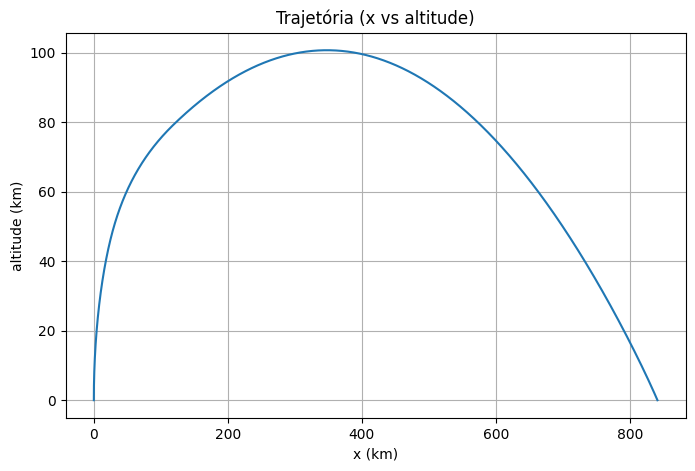

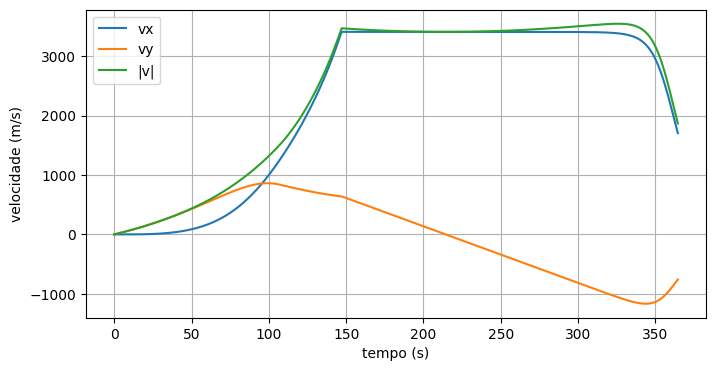

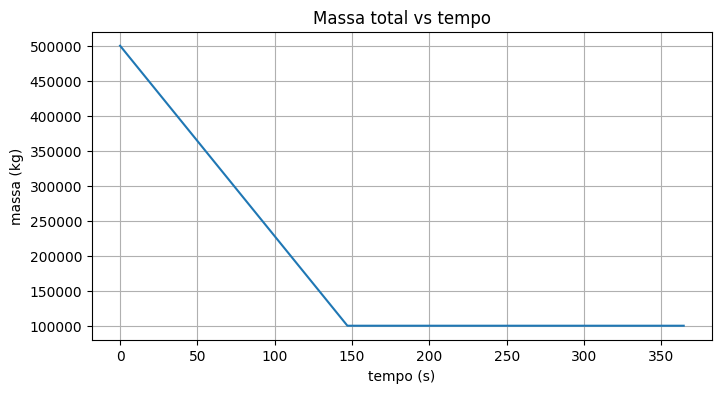

In [ ]:
# Simula√ß√£o 2D com pitch-over ‚Äî vers√£o robusta (while loop)
# - cuidado com nomes: usamos 'y' para altitude (nunca 'h' misturado)
# - calcula rho com math.exp (escalares) e trata divis√£o por zero no arrasto
# - usa while com t += dt para evitar loop infinito
# - imprime debug a cada some segundos para voc√™ acompanhar

import math
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Constantes e par√¢metros
# --------------------------
g0 = 9.80665           # m/s^2
Re = 6371000.0         # m
rho0 = 1.225           # kg/m^3 (n√≠vel do mar)
H = 8500.0             # m (escala da atmosfera)

# foguete (exemplo single-stage para simplicidade; ajuste livre)
dry_mass = 1.0e5       # kg (massa seca)
fuel_mass = 4.0e5      # kg (combust√≠vel)
mass = dry_mass + fuel_mass
Isp = 300.0            # s
thrust = 8.0e6         # N (empuxo durante a queima)
Cd = 0.5
A = 10.0

burn_time = 150.0      # s (tempo em que o motor produz empuxo)
# pitch profile (medido a partir da vertical: 0 = vertical, 90 graus = horizontal)
pitch_start_alt = 200.0     # m (onde come√ßa a curvar)
pitch_end_alt   = 50000.0   # m (onde termina a curvatura)
pitch_end_angle_deg = 85.0  # graus (quase horizontal)

# integra√ß√£o
dt = 0.1                # passo (s)
t_max = 1000.0          # tempo max (s)

# --------------------------
# Fun√ß√µes auxiliares
# --------------------------
def gravity(h):
    """gravidade em altitude h (m) usando 1/r^2"""
    return g0 * (Re / (Re + max(h,0.0)))**2

def air_density(h):
    """densidade exponencial (scalar)"""
    return rho0 * math.exp(-max(h,0.0) / H)

def pitch_angle_from_profile(h):
    """Retorna √¢ngulo (rad) medido a partir da vertical: 0 = vertical up"""
    if h < pitch_start_alt:
        return 0.0
    if h >= pitch_end_alt:
        return math.radians(pitch_end_angle_deg)
    frac = (h - pitch_start_alt) / (pitch_end_alt - pitch_start_alt)
    return frac * math.radians(pitch_end_angle_deg)

# --------------------------
# Estado inicial
# --------------------------
t = 0.0
x = 0.0                 # posi√ß√£o horizontal (m)
y = 0.0                 # altitude (m)
vx = 0.0                # velocidade horizontal (m/s)
vy = 0.0                # velocidade vertical (m/s)

mass = dry_mass + fuel_mass
fuel_remaining = fuel_mass

# armazenamento para plot
times = []
xs = []
ys = []
vxs = []
vys = []
masses = []
pitches = []

# --------------------------
# Loop de simula√ß√£o (while)
# --------------------------
print_interval = 10.0   # imprime status a cada this many seconds
next_print = 0.0

while t <= t_max:
    # --- empuxo e consumo ---
    if t < burn_time and fuel_remaining > 1e-9:
        T_now = thrust
        mdot = thrust / (Isp * g0)   # kg/s (taxa de consumo aproximada)
        dm = min(mdot * dt, fuel_remaining)
    else:
        T_now = 0.0
        mdot = 0.0
        dm = 0.0

    # atualiza combust√≠vel/massa
    fuel_remaining -= dm
    mass -= dm
    if mass < dry_mass:
        mass = dry_mass
        fuel_remaining = 0.0

    # --- aerodin√¢mica ---
    rho = air_density(y)                      # usa 'y' (altitude) ‚Äî n√£o use 'h' se n√£o existir
    vmag = math.hypot(vx, vy)                 # magnitude da velocidade (evita confus√£o v vs vx/vy)

    # arrasto: magnitude
    D = 0.5 * rho * Cd * A * (vmag**2)

    # componentes do arrasto (op√µem-se ao vetor velocidade)
    if vmag > 1e-9:
        drag_x = D * (vx / vmag)
        drag_y = D * (vy / vmag)
    else:
        drag_x = 0.0
        drag_y = 0.0

    # --- pitch / dire√ß√£o do empuxo ---
    pitch = pitch_angle_from_profile(y)   # rad: 0 = vertical, >0 inclina para frente (gera vx)
    # empuxo: componentes (note a conven√ß√£o: sen/cos dependendo de como define o pitch)
    # aqui usamos T_x = T * sin(pitch) e T_y = T * cos(pitch) com pitch a partir da vertical
    thrust_x = T_now * math.sin(pitch)
    thrust_y = T_now * math.cos(pitch)

    # --- acelera√ß√µes ---
    ax = (thrust_x - drag_x) / mass
    ay = (thrust_y - drag_y) / mass - gravity(y)

    # --- integra√ß√£o (Euler expl√≠cito, simples e est√°vel com dt pequeno) ---
    vx += ax * dt
    vy += ay * dt
    x += vx * dt
    y += vy * dt

    # registro
    times.append(t)
    xs.append(x)
    ys.append(y)
    vxs.append(vx)
    vys.append(vy)
    masses.append(mass)
    pitches.append(pitch)

    # prints peri√≥dicos para monitorar (evita flood no output)
    if t >= next_print:
        print(f"t={t:6.1f}s  y={y:8.1f} m  vx={vx:7.1f} m/s  vy={vy:7.1f} m/s  mass={mass:8.1f} kg  pitch={math.degrees(pitch):5.1f}¬∞")
        next_print += print_interval

    # condi√ß√£o de parada: voltou ao solo ap√≥s subir
    if y < 0 and t > 0.5:
        y = 0.0
        print("‚Üí foguete tocou o solo. Parando a simula√ß√£o.")
        break

    # avan√ßa tempo (ESSENCIAL em while!)
    t += dt

# --------------------------
# Resultados e plots
# --------------------------
times = np.array(times)
xs = np.array(xs) / 1000.0    # km
ys = np.array(ys) / 1000.0    # km
vxs = np.array(vxs)
vys = np.array(vys)
masses = np.array(masses)
pitches_deg = np.degrees(np.array(pitches))

print("\nResumo final:")
print(f"Tempo simulado: {times[-1]:.1f} s")
print(f"Altitude m√°xima: { (ys.max()*1000):.1f} m  ({ys.max():.3f} km)")
speed = np.hypot(vxs, vys)
print(f"Velocidade m√°xima: {speed.max():.1f} m/s")

plt.figure(figsize=(8,5))
plt.plot(xs, ys)
plt.xlabel("x (km)")
plt.ylabel("altitude (km)")
plt.title("Trajet√≥ria (x vs altitude)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(times, vxs, label='vx')
plt.plot(times, vys, label='vy')
plt.plot(times, np.hypot(vxs,vys), label='|v|')
plt.xlabel("tempo (s)")
plt.ylabel("velocidade (m/s)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(times, masses)
plt.xlabel("tempo (s)")
plt.ylabel("massa (kg)")
plt.title("Massa total vs tempo")
plt.grid(True)
plt.show()

Massa inicial: 160 kg
‚úÖ Dados salvos em simulacao_foguete.csv


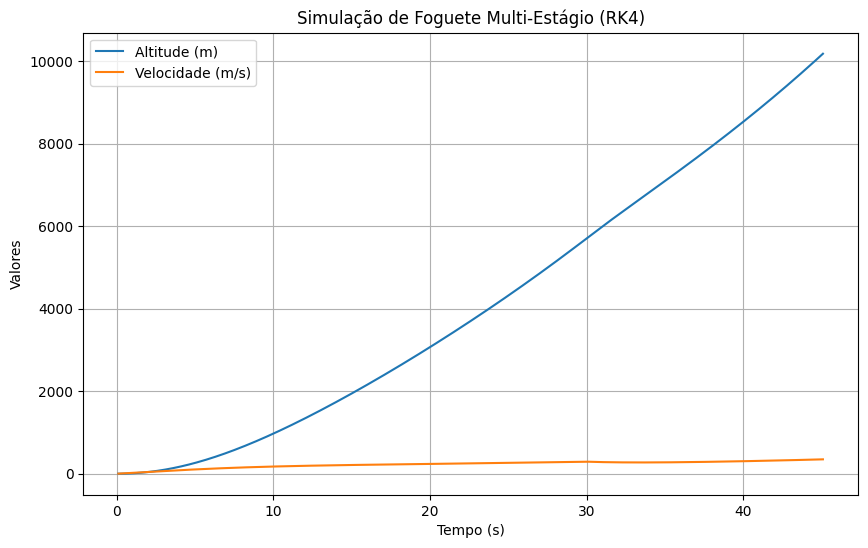

In [ ]:
# üöÄ Simula√ß√£o de Foguete Multi-Est√°gio com RK4
# Autor: Gabriel Xavier Oscar (pronto para GitHub)

import math
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------
# Configura√ß√µes iniciais
# ------------------------

g = 9.81               # gravidade (m/s¬≤)
rho0 = 1.225           # densidade do ar ao n√≠vel do mar (kg/m¬≥)
H = 8500               # escala de altura da atmosfera (m)

# Fun√ß√£o para calcular densidade em fun√ß√£o da altitude
def densidade_ar(h):
    return rho0 * math.exp(-h / H)

# ------------------------
# Defini√ß√£o dos est√°gios
# ------------------------
# Cada est√°gio tem: massa combust√≠vel, massa estrutural, empuxo, √°rea frontal, Cd, tempo de queima

estagios = [
    {"m_comb": 100, "m_estrut": 20, "empuxo": 5000, "Cd": 0.5, "A": 0.3, "tq": 30},
    {"m_comb": 30,  "m_estrut": 10, "empuxo": 2000, "Cd": 0.4, "A": 0.2, "tq": 15}
]

# Massa inicial total
m0 = sum([e["m_comb"] + e["m_estrut"] for e in estagios])
print(f"Massa inicial: {m0} kg")

# ------------------------
# Din√¢mica do foguete
# ------------------------
def forcas(h, v, m, estagio):
    """ Calcula a acelera√ß√£o com base no est√°gio atual """
    rho = densidade_ar(h)
    drag = 0.5 * rho * v * abs(v) * estagio["Cd"] * estagio["A"]
    F = estagio["empuxo"] - drag - m * g
    a = F / m
    return a

# ------------------------
# Integra√ß√£o RK4
# ------------------------
def rk4_step(h, v, m, estagio, dt, dm):
    """ Executa um passo RK4 """
    def f(v_local, m_local):
        return forcas(h, v_local, m_local, estagio)

    # Velocidade
    k1v = f(v, m)
    k2v = f(v + 0.5*dt*k1v, m - 0.5*dm)
    k3v = f(v + 0.5*dt*k2v, m - 0.5*dm)
    k4v = f(v + dt*k3v, m - dm)

    v_new = v + dt/6*(k1v + 2*k2v + 2*k3v + k4v)
    h_new = h + dt*v
    m_new = m - dm

    return h_new, v_new, m_new

# ------------------------
# Loop de simula√ß√£o
# ------------------------
t, h, v = 0, 0, 0
m = m0
dt = 0.1

data = []

for idx, estagio in enumerate(estagios):
    m_comb = estagio["m_comb"]
    tq = estagio["tq"]
    dm_dt = m_comb / tq  # taxa de queima

    tempo_estagio = 0
    while tempo_estagio < tq:
        dm = dm_dt * dt
        h, v, m = rk4_step(h, v, m, estagio, dt, dm)
        t += dt
        tempo_estagio += dt

        data.append([t, h, v, m, idx+1])

    # Solta a massa estrutural ao final
    m -= estagio["m_estrut"]

# ------------------------
# Salvar CSV
# ------------------------
df = pd.DataFrame(data, columns=["Tempo (s)", "Altitude (m)", "Velocidade (m/s)", "Massa (kg)", "Est√°gio"])
df.to_csv("simulacao_foguete.csv", index=False)
print("‚úÖ Dados salvos em simulacao_foguete.csv")

# ------------------------
# Gr√°ficos
# ------------------------
plt.figure(figsize=(10,6))
plt.plot(df["Tempo (s)"], df["Altitude (m)"], label="Altitude (m)")
plt.plot(df["Tempo (s)"], df["Velocidade (m/s)"], label="Velocidade (m/s)")
plt.xlabel("Tempo (s)")
plt.ylabel("Valores")
plt.legend()
plt.title("Simula√ß√£o de Foguete Multi-Est√°gio (RK4)")
plt.grid(True)
plt.show()